In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import joblib

In [156]:
def load_and_prepare_data(seed_dir, seeds_train):
    train_df = []
    for i in seeds_train:
        seed_df = pd.read_csv(seed_dir + f'seir_seed_{i}.csv')
        seed_df['day'] = np.arange(len(seed_df))
        train_df.append(seed_df)
    
    train_df = pd.concat(train_df, ignore_index=True)
    train_df = train_df[train_df['Beta'] > 0].copy()
    
    #train_df['Beta'].replace(0, 1e-7, inplace=True)
    #train_df['Beta'] = train_df['Beta'].fillna(1e-7)
    
    train_df = train_df[(train_df['E'] > 0)|(train_df['I'] > 0)].copy()
    train_df['log_Beta'] = np.log(train_df['Beta'])
    return train_df

def train_model(train_df, model_file):
    X = train_df[['day']].values
    y = train_df['log_Beta'].values

    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(include_bias=False, degree=3),
        SGDRegressor(alpha=0.0001, max_iter=5000, 
                     penalty='l2', warm_start=False)
    )

    model.fit(X, y)
    print(model.score(X, y))
    joblib.dump(model, model_file)

def plot(model_file):
    model = joblib.load(model_file)
    X = train_df[['day']].values
    y = train_df['log_Beta'].values
    print(model.score(X, y))

    fig = plt.figure(figsize=(5, 3)) 
    plt.plot(X, y, alpha=0.1, ls='', marker='.')
    pred = model.predict(np.arange(250).reshape(-1, 1))
    plt.plot(np.arange(250), pred)
    plt.ylim(np.quantile(y,.0001), 0)
    plt.grid()

    fig = plt.figure(figsize=(5, 3)) 
    plt.plot(train_df.day, train_df.Beta, ls='', marker='.', alpha=.1)
    plt.plot(np.arange(250), np.exp(pred))
    plt.ylim(0, train_df.Beta.quantile(0.99))
    plt.grid()

In [7]:
df_seeds = pd.read_csv('initial_data/seeds_set_parameters.csv')
seeds_train = df_seeds[df_seeds.set!='test']['seed_number'].values

0.4884912544997959
0.4884912544997959


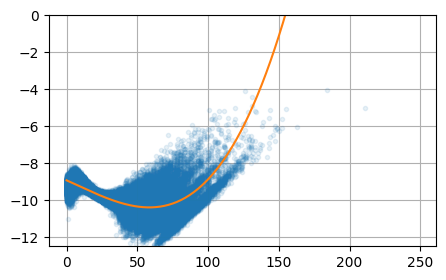

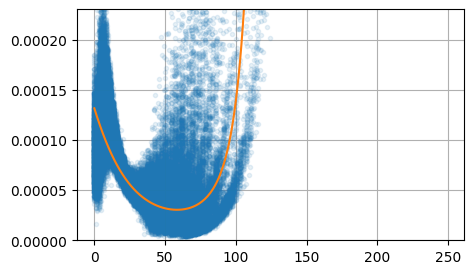

In [159]:
seed_dir='initial_data/initial_data_ba_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.6998402395269039
0.6998402395269039


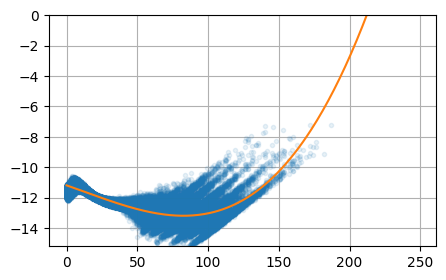

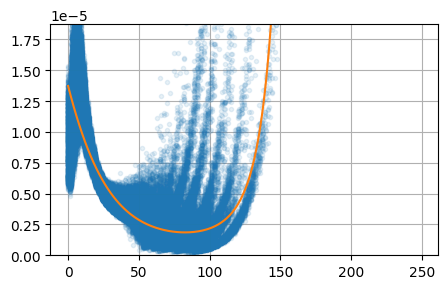

In [160]:
seed_dir='initial_data/initial_data_ba_100000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.3402580558804308
0.3402580558804308


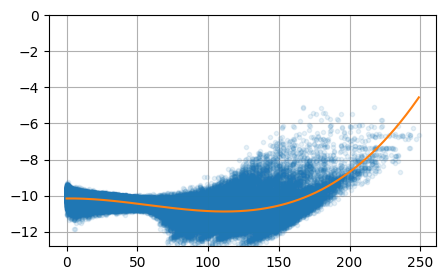

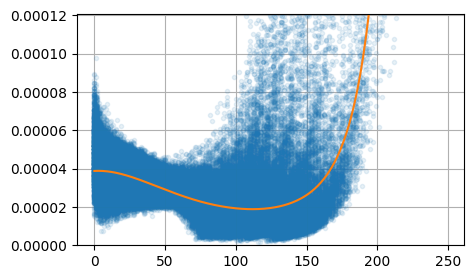

In [161]:
seed_dir='initial_data/initial_data_r_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.49284274844912734
0.49284274844912734


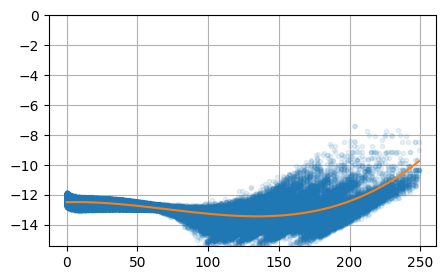

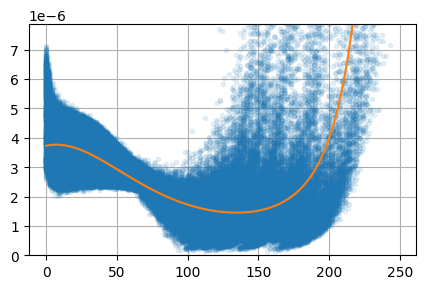

In [162]:
seed_dir='initial_data/initial_data_r_100000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.30791474695016896
0.30791474695016896


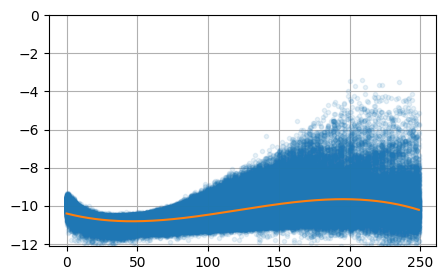

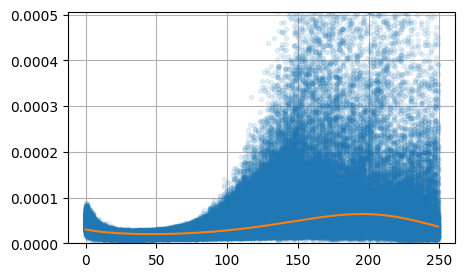

In [163]:
seed_dir='initial_data/initial_data_sw_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.4203588632698436
0.4203588632698436


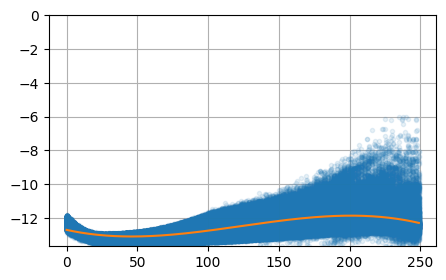

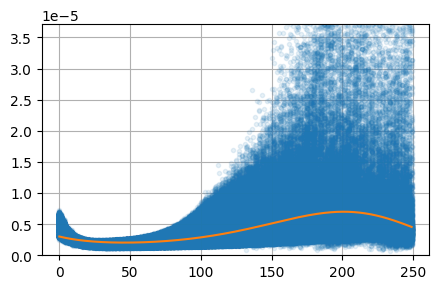

In [164]:
seed_dir='initial_data/initial_data_sw_100000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)